In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# set theme
plt.style.use('seaborn')
sns.set_style('darkgrid')

<ipython-input-32-c7bd5f3812ab>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [89]:
prices = pd.read_csv('/content/drive/MyDrive/final_data_norm.csv', index_col=0)
prices = prices.dropna(axis=1)
returns = np.log(prices).diff().dropna()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [101]:
returns.head(1000)

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr16,Instr17
Timestamp,,,,,,,,,,,,,,,
1/15/2018,0.130973,0.158917,0.181080,0.207595,0.228823,0.246988,0.270307,0.295741,0.326552,0.368944,0.404288,0.454698,0.539169,1.077763,1.390907
1/16/2018,-0.429846,-0.419833,-0.417336,-0.417719,-0.415104,-0.425432,-0.441959,-0.467667,-0.506398,-0.553157,-0.592455,-0.652314,-0.743011,-1.345539,-1.646136
1/17/2018,0.105508,0.103738,0.095824,0.082884,0.080662,0.085540,0.092262,0.101829,0.114445,0.131652,0.146471,0.178561,0.226631,0.547690,0.744257
1/18/2018,-0.030949,-0.036490,-0.027796,-0.018893,-0.009734,0.005111,0.016390,0.023916,0.033235,0.045220,0.049831,0.065164,0.086294,0.200453,0.243942
1/19/2018,-0.377359,-0.379642,-0.391759,-0.391912,-0.397026,-0.402511,-0.417619,-0.446892,-0.476731,-0.532136,-0.575343,-0.615504,-0.706003,-1.232356,-1.510860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/30/2023,-0.017001,-0.133952,-0.132479,-0.133290,-0.133490,-0.135119,-0.134287,-0.133687,-0.133264,-0.132920,-0.131467,-0.130836,-0.131010,-0.127890,-0.126342
12-01-2023,-0.288805,-0.160526,-0.150277,-0.139047,-0.131152,-0.126717,-0.124730,-0.123797,-0.122229,-0.121553,-0.121059,-0.119927,-0.118935,-0.114006,-0.112590
12-04-2023,-0.074780,-0.060090,-0.047191,-0.037373,-0.027929,-0.019606,-0.013045,-0.006529,-0.002456,0.000823,0.003316,0.005017,0.008441,0.012947,0.013058


In [90]:


prices_form = prices.loc['11/20/2018':'5/19/2020']
prices_trade = prices.loc['5/20/2021':'11/19/2021']


In [85]:
prices_form.head()

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr16,Instr17
Timestamp,,,,,,,,,,,,,,,
11/20/2018,-0.241640,-0.217275,-0.196079,-0.176944,-0.157653,-0.141625,-0.128288,-0.119691,-0.115212,-0.110266,-0.105645,-0.102276,-0.095492,-0.071803,-0.063460
11/21/2018,-0.191221,-0.162505,-0.138024,-0.115637,-0.093125,-0.072660,-0.055522,-0.043110,-0.034788,-0.026674,-0.018892,-0.012358,-0.002391,0.029717,0.039916
11/22/2018,-0.237925,-0.215063,-0.192630,-0.171587,-0.149664,-0.129604,-0.112696,-0.100379,-0.091358,-0.082402,-0.073646,-0.066019,-0.055592,-0.021043,-0.009386
11/23/2018,-0.439599,-0.427504,-0.415653,-0.402532,-0.388109,-0.373197,-0.360231,-0.350766,-0.344897,-0.338750,-0.331060,-0.325621,-0.315685,-0.283435,-0.272599
11/26/2018,-0.350438,-0.343413,-0.331732,-0.318606,-0.303301,-0.287148,-0.273171,-0.263530,-0.256976,-0.250282,-0.243596,-0.238604,-0.228494,-0.195971,-0.186717


In [75]:
prices_form.head()

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr16,Instr17
Timestamp,,,,,,,,,,,,,,,
03-11-2016,-1.416659,-1.420558,-1.426727,-1.426903,-1.424853,-1.421595,-1.414042,-1.403588,-1.393133,-1.382952,-1.372094,-1.360408,-1.351622,-1.325976,-1.319087


In [102]:

returns_form = returns.loc['11-12-2018':'5/28/2019']
returns_trade = returns.loc['05-12-2021':'11/19/2021']

In [103]:

# Calculate Kendall's tau for each pair of stocks
results = pd.DataFrame(columns=['tau'])

for s1 in returns_form.columns:
    for s2 in returns_form.columns:
        if (s1!=s2) and (f'{s2}-{s1}' not in results.index):
            results.loc[f'{s1}-{s2}'] = stats.kendalltau(returns_form[s1], returns_form[s2])[0]

In [104]:
results.to_csv('pairs_tau.csv')

In [105]:
results = pd.read_csv('pairs_tau.csv', index_col=0)

In [106]:
results.sort_values(by='tau')

,tau
Instr1-Instr17,0.624150
Instr1-Instr16,0.649660
Instr2-Instr17,0.695578
Instr1-Instr13,0.698980
Instr1-Instr12,0.707483
...,...
Instr9-Instr10,0.976190
Instr7-Instr8,0.981293
Instr12-Instr13,0.984694
Instr11-Instr12,0.988095


In [107]:
def parse_pair(pair):
    s1 = pair[:pair.find('-')]
    s2 = pair[pair.find('-')+1:]
    return s1,s2

In [108]:
selected_stocks = []
selected_pairs = []

for pair in results.sort_values(by='tau', ascending=False).index:
    s1,s2 = parse_pair(pair)
    if (s1 not in selected_stocks) and (s2 not in selected_stocks):
        selected_stocks.append(s1)
        selected_stocks.append(s2)
        selected_pairs.append(pair)

    if len(selected_pairs) == 25:
        break

In [109]:
print(selected_pairs)

['Instr11-Instr12', 'Instr8-Instr9', 'Instr5-Instr6', 'Instr16-Instr17', 'Instr3-Instr4', 'Instr7-Instr10', 'Instr1-Instr2']


# Fit marginals

In [110]:
marginals_df = pd.DataFrame(index=selected_stocks, columns=['Distribution', 'AIC', 'BIC', 'KS_pvalue'])

for stock in selected_stocks:
    data = returns_form[stock]
    dists = ['Normal', "Student's t", 'Logistic', 'Extreme']
    best_aic = np.inf
    for dist,name in zip([stats.norm, stats.t, stats.genlogistic, stats.genextreme], dists):
        params = dist.fit(data)
        dist_fit = dist(*params)
        log_like = np.log(dist_fit.pdf(data)).sum()
        aic = 2*len(params) - 2 * log_like
        if aic<best_aic:
            best_dist = name
            best_aic = aic
            best_bic = len(params) * np.log(len(data)) - 2 * log_like
            ks_pval = stats.kstest(data, dist_fit.cdf, N=100)[1]
    marginals_df.loc[stock] = [best_dist, best_aic, best_bic, ks_pval]

In [111]:
marginals_df.head(10)

,Distribution,AIC,BIC,KS_pvalue
Instr11,Normal,18.668491,22.452132,0.857479
Instr12,Logistic,20.00376,25.679221,0.950316
Instr8,Normal,24.349663,28.133304,0.861912
Instr9,Normal,21.365813,25.149454,0.893472
Instr5,Logistic,35.434551,41.110012,0.624959
Instr6,Logistic,31.713455,37.388916,0.771655
Instr16,Student's t,28.08629,33.761751,0.989581
Instr17,Student's t,35.282557,40.958018,0.982366
Instr3,Student's t,41.861609,47.53707,0.975836
Instr4,Student's t,39.930366,45.605827,0.939207


In [112]:
marginals_df['Distribution'].unique()

array(['Normal', 'Logistic', "Student's t"], dtype=object)

In [113]:
marginals_df[marginals_df['KS_pvalue'] < 0.05]

,Distribution,AIC,BIC,KS_pvalue


# Fit copulas

In [114]:
pip install git+https://github.com/syrte/ndtest

  Cloning https://github.com/syrte/ndtest to /tmp/pip-req-build-tlrndyh_
  Running command git clone --filter=blob:none --quiet https://github.com/syrte/ndtest /tmp/pip-req-build-tlrndyh_
  Resolved https://github.com/syrte/ndtest to commit 29ced2bfd65a3b8f51587cd5aa90ea19aa85e568
  Preparing metadata (setup.py) ... done


In [115]:
pip install copulas

In [116]:
from copulas import *
import ndtest # bivariate Kolmogorov-Smirnov

In [28]:
def log_likelihood(dataframe, model):
  """Calculates the log-likelihood of a dataframe under a model.

  Args:
    dataframe: A Pandas DataFrame containing the data.
    model: A statistical model.

  Returns:
    The log-likelihood of the dataframe under the model.
  """

  log_likelihoods = []
  for i in range(len(dataframe)):
    data_point = dataframe.iloc[i]
    probability = model.predict(data_point)
    log_likelihood = np.log(probability)
    log_likelihoods.append(log_likelihood)

  return np.sum(log_likelihoods)

In [69]:
u

array([0.5])

In [155]:
copulas_df = pd.DataFrame(index=selected_pairs, columns=['copula', 'parameter', 'aic', 'bic', 'KS_pvalue'])
from copulas.multivariate import GaussianMultivariate


for pair in selected_pairs:
    s1,s2 = parse_pair(pair)
    # fit marginals
    params_s1 = stats.t.fit(returns_form[s1])
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(returns_form[s2])
    dist_s2 = stats.t(*params_s2)
    # apply probability integral transform
    u = dist_s1.cdf(returns_form[s1])
    v = dist_s2.cdf(returns_form[s2])

    best_aic = np.inf

    for copula in [GaussianMultivariate()]:
        copula.fit(u)
        synthetic_data = copula.sample(num_rows=100)
        L =(copula.log_probability_density(synthetic_data))
        aic = 2 * len(copula.to_dict()) - 2 * L
        best_aic = aic
        best_bic = len(copula.to_dict()) * np.log(len(u)) - 2 * L
        best_copula = copula
            # calculate KS-pvalue
        smp = copula.sample(len(u)) # generate sample from fit copula
        copula.fit(v)
        smv = copula.sample(len(v))
        smv=smv.to_numpy()
        smp=smp.to_numpy()
        smv=np.reshape(smv,(49,))
        smp=np.reshape(smp,(49,))
        ks_pval= ndtest.ks2d2s(u,v,smp,smv)
        best_param = copula.to_dict()

    copulas_df.loc[pair] = [best_copula, best_param, best_aic, best_bic, ks_pval]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Valu

In [156]:
copulas_df.head(10)

,copula,parameter,aic,bic,KS_pvalue
Instr11-Instr12,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.945875969436377, 9.872961642186889, 13.201...","[18.513157161878883, 17.440242834629395, 20.76...",0.008488
Instr8-Instr9,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[9.837900075984889, 10.071857041694972, 9.9143...","[17.405181268427395, 17.639138234137477, 17.48...",0.003173
Instr5-Instr6,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[9.837975269261115, 11.353314542657166, 10.462...","[17.405256461703623, 18.920595735099674, 18.03...",0.077479
Instr16-Instr17,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[11.277464739839763, 12.395602316233065, 9.883...","[18.84474593228227, 19.96288350867557, 17.4504...",0.036113
Instr3-Instr4,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[9.84108093420927, 10.342401887740966, 10.0925...","[17.408362126651774, 17.90968308018347, 17.659...",0.008459
Instr7-Instr10,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'a':...","[14.51212875108769, 12.06815944749146, 9.97146...","[22.079409943530194, 19.635440639933968, 17.53...",0.008514
Instr1-Instr2,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[9.90774418171833, 10.693821681850777, 10.1804...","[17.475025374160836, 18.261102874293282, 17.74...",0.003089


In [157]:
copulas_df['copula'].unique()

array([GaussianMultivariate(), GaussianMultivariate(),
       GaussianMultivariate(), GaussianMultivariate(),
       GaussianMultivariate(), GaussianMultivariate(),
       GaussianMultivariate()], dtype=object)

In [158]:
copulas_df[copulas_df['KS_pvalue']<0.05]

,copula,parameter,aic,bic,KS_pvalue
Instr11-Instr12,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'loc...","[10.945875969436377, 9.872961642186889, 13.201...","[18.513157161878883, 17.440242834629395, 20.76...",0.008488
Instr8-Instr9,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[9.837900075984889, 10.071857041694972, 9.9143...","[17.405181268427395, 17.639138234137477, 17.48...",0.003173
Instr16-Instr17,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[11.277464739839763, 12.395602316233065, 9.883...","[18.84474593228227, 19.96288350867557, 17.4504...",0.036113
Instr3-Instr4,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[9.84108093420927, 10.342401887740966, 10.0925...","[17.408362126651774, 17.90968308018347, 17.659...",0.008459
Instr7-Instr10,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'a':...","[14.51212875108769, 12.06815944749146, 9.97146...","[22.079409943530194, 19.635440639933968, 17.53...",0.008514
Instr1-Instr2,GaussianMultivariate(),"{'correlation': [[1.0]], 'univariates': [{'dat...","[9.90774418171833, 10.693821681850777, 10.1804...","[17.475025374160836, 18.261102874293282, 17.74...",0.003089


In [166]:
algo_returns = {}
cl = 0.99 # confidence level

for pair in selected_pairs:
    s1,s2 = parse_pair(pair)

    # fit marginals
    params_s1 = stats.t.fit(returns_form[s1])
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(returns_form[s2])
    dist_s2 = stats.t(*params_s2)

    # transform marginals
    u = dist_s1.cdf(returns_form[s1])
    v = dist_s2.cdf(returns_form[s2])

    # fit copula
    best_aic = np.inf
    best_copula = None

    copulas = [GaussianMultivariate()]
    for copula in copulas:
        copula.fit(u)
        synthetic_data = copula.sample(num_rows=118)
        L =np.average(copula.log_probability_density(synthetic_data))
        aic = 2 * len(copula.to_dict()) - 2 * L
        copula.fit(v)
        synthetic_data1 = copula.sample(num_rows=118)
        if aic < best_aic:
            best_aic = aic
            best_copula = copula

    # calculate conditional probabilities
    prob_s1 = []
    prob_s2 = []

    for u,v in zip(dist_s1.cdf(returns_trade[s1]), dist_s2.cdf(returns_trade[s2])):

        prob_s1.append(best_copula.cdf(synthetic_data))
        prob_s2.append(best_copula.cdf(synthetic_data1))
    probs_trade = pd.DataFrame(np.vstack([prob_s1, prob_s2]))

    # calculate positions
    positions = pd.DataFrame(index=probs_trade.index, columns=probs_trade.columns)
    long = False
    short = False

    for t in positions.index:
        # if long position is open
        if long:
            if (probs_trade.loc[t][s1] > 0.5) or (probs_trade.loc[t][s2] < 0.5):
                positions.loc[t] = [0,0]
                long = False
            else:
                positions.loc[t] = [1,-1]

        # if short position is open
        elif short:
            if (probs_trade.loc[t][s1] < 0.5) or (probs_trade.loc[t][s2] > 0.5):
                positions.loc[t] = [0,0]
                short = False
            else:
                positions.loc[t] = [-1,1]


    # calculate returns
    algo_ret = (returns_trade * positions.shift()).sum(axis=1)
    algo_returns[pair] = algo_ret

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Valu

In [167]:
returns = pd.DataFrame.from_dict(algo_returns)
returns = np.exp(returns) - 1 # convert log-returns to simple returns

In [168]:
total_ret = returns.sum(axis=1) / len(returns.columns) * 2 # double capital (from short positions)

In [169]:
import yfinance as yf
vbr_price = yf.download('VBR', start=trade_start, end=trade_end)
vbr_price = vbr_price['Adj Close']
vbr_ret = vbr_price.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VBR']: ValueError("time data '11/19/2021' does not match format '%Y-%m-%d'")


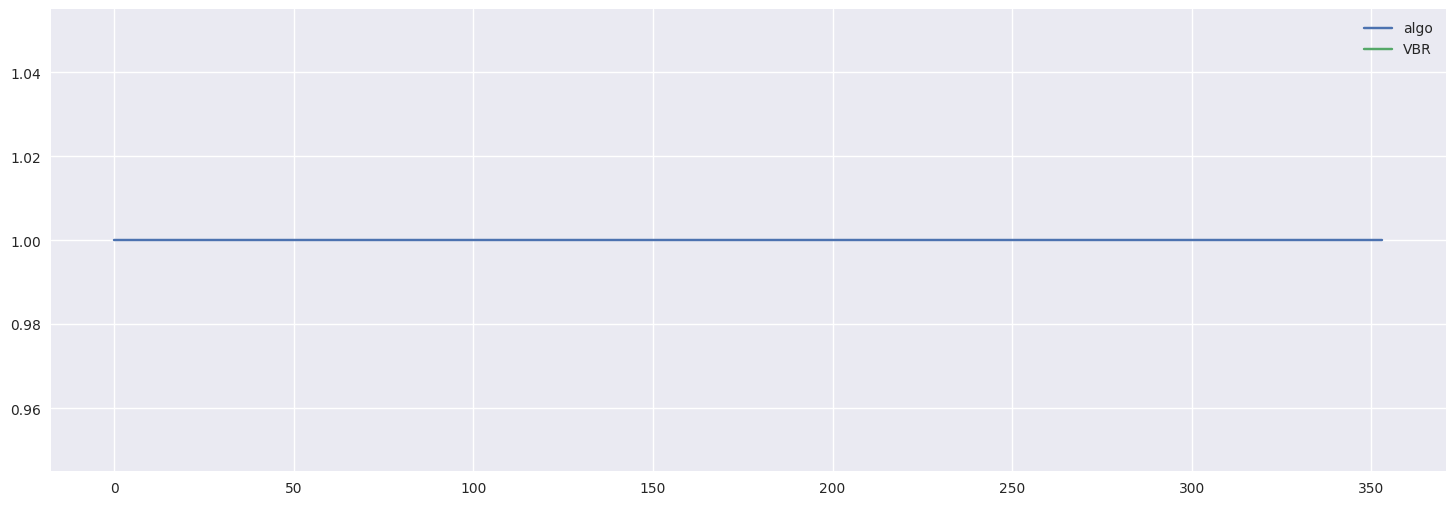

In [170]:
plt.figure(figsize=(18,6))
plt.plot(np.nancumprod(total_ret + 1), label='algo')
plt.plot(np.nancumprod(vbr_ret + 1), label='VBR')
plt.legend()

In [171]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)

    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)

    return total_return, apr, sharpe, maxDD, maxDDD

In [172]:
metrics = pd.DataFrame(index=['Algo', 'VBR'], columns=['Total return', 'APR', 'Sharpe', 'MaxDD', 'MaxDDD'])
metrics.loc['Algo'] = calculate_metrics(np.nancumprod(total_ret + 1))
metrics.loc['VBR'] = calculate_metrics(np.nancumprod(vbr_ret + 1))
metrics

<ipython-input-171-8ed914f6bee2>:8: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)


IndexError: ignored

# Exit earlier

In [173]:
algo_returns = {}
cl = 0.99 # confidence level

for pair in selected_pairs:
    s1,s2 = parse_pair(pair)

    # fit marginals
    params_s1 = stats.t.fit(returns_form[s1])
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(returns_form[s2])
    dist_s2 = stats.t(*params_s2)

    # transform marginals
    u = dist_s1.cdf(returns_form[s1])
    v = dist_s2.cdf(returns_form[s2])

    # fit copula
    best_aic = np.inf
    best_copula = None

    copulas = [GaussianCopula(), ClaytonCopula(), GumbelCopula(), FrankCopula(), JoeCopula()]
    for copula in copulas:
        copula.fit(u,v)
        L = copula.log_likelihood(u,v)
        aic = 2 * copula.num_params - 2 * L
        if aic < best_aic:
            best_aic = aic
            best_copula = copula

    # calculate conditional probabilities
    prob_s1 = []
    prob_s2 = []

    for u,v in zip(dist_s1.cdf(returns_trade[s1]), dist_s2.cdf(returns_trade[s2])):
        prob_s1.append(best_copula.cdf_u_given_v(u,v))
        prob_s2.append(best_copula.cdf_v_given_u(u,v))

    probs_trade = pd.DataFrame(np.vstack([prob_s1, prob_s2]).T, index=returns_trade.index, columns=[s1, s2])

    # calculate positions
    positions = pd.DataFrame(index=probs_trade.index, columns=probs_trade.columns)
    long = False
    short = False

    for t in positions.index:
        # if long position is open
        if long:
            if (probs_trade.loc[t][s1] > 0.3) or (probs_trade.loc[t][s2] < 0.7):
                positions.loc[t] = [0,0]
                long = False
            else:
                positions.loc[t] = [1,-1]

        # if short position is open
        elif short:
            if (probs_trade.loc[t][s1] < 0.7) or (probs_trade.loc[t][s2] > 0.3):
                positions.loc[t] = [0,0]
                short = False
            else:
                positions.loc[t] = [-1,1]

        # if no positions are open
        else:
            if (probs_trade.loc[t][s1] < (1-cl)) and (probs_trade.loc[t][s2] > cl):
                # open long position
                positions.loc[t] = [1,-1]
                long = True
            elif (probs_trade.loc[t][s1] > cl) and (probs_trade.loc[t][s2] < (1-cl)):
                # open short positions
                positions.loc[t] = [-1,1]
                short = True
            else:
                positions.loc[t] = [0,0]

    # calculate returns
    algo_ret = (returns_trade * positions.shift()).sum(axis=1)
    algo_returns[pair] = algo_ret

NameError: ignored

In [ ]:
returns = pd.DataFrame.from_dict(algo_returns)
returns = np.exp(returns) - 1 # convert log-returns to simple returns

In [ ]:
total_ret = returns.sum(axis=1) / len(returns.columns) * 2 # double capital (from short positions)

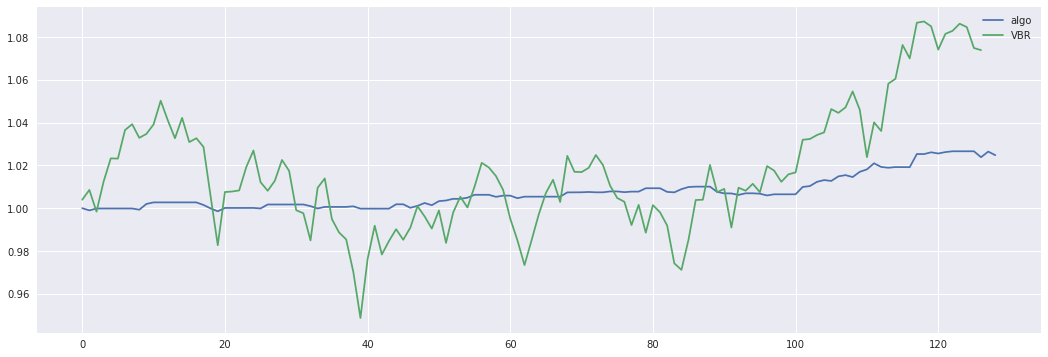

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(np.nancumprod(total_ret + 1), label='algo')
plt.plot(np.nancumprod(vbr_ret + 1), label='VBR')
plt.legend()

In [ ]:
metrics = pd.DataFrame(index=['Algo', 'VBR'], columns=['Total return', 'APR', 'Sharpe', 'MaxDD', 'MaxDDD'])
metrics.loc['Algo'] = calculate_metrics(np.nancumprod(total_ret + 1))
metrics.loc['VBR'] = calculate_metrics(np.nancumprod(vbr_ret + 1))
metrics

,Total return,APR,Sharpe,MaxDD,MaxDDD
Algo,0.024795,0.049009,2.75403,-0.004165,33.0
VBR,0.069689,0.143021,0.867726,-0.096744,96.0
